## Importing the required modules

In [118]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [119]:
df_dir = r"Churn_Modelling.csv"

## Loading the datasets

In [120]:
df = pd.read_csv(df_dir)
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (10000, 14)


In [121]:
# exploring the dataset and checking for missing values
print("Dataset Info:")
print(df.info())

print("Checking for missing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
Checking for missing values:
RowNumber          0
CustomerId         0
Surn

In [122]:
# descriptive statistics
print("Descriptive Statistics:")
print(df.describe())
print("-------------")
# looking at the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


Descriptive Statistics:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
m

## Preprocessing of data...

In [123]:
# One-hot encoding 'Geography'
df = pd.get_dummies(df, columns=['Geography']) 

# Label encoding the 'Gender'
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender']) 

In [124]:
# Dropping irrelevant columns like 'RowNumber', 'CustomerId', 'Surname'
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True, errors='ignore')

In [125]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True


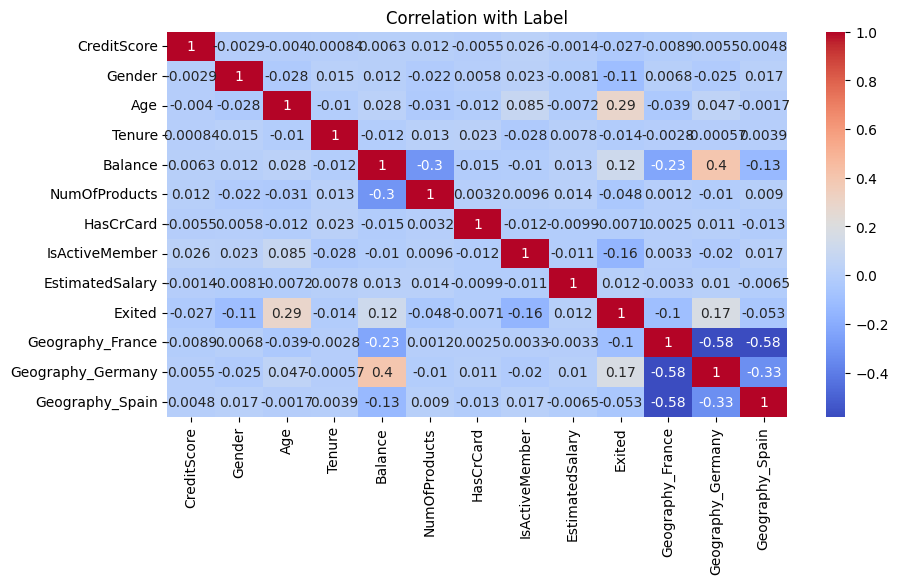

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Geography_France    -0.104955
Gender              -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64

In [126]:
# Now let us check how the different features are correlated with each other
corr_train_data = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(data=corr_train_data, annot=True, cmap='coolwarm')
plt.title("Correlation with Label")
plt.show()

# check correlation with the 'Exited' column
corr_train_data['Exited'].sort_values(ascending=False)


In [127]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [128]:
# Spliting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training our first model: Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

LogisticRegression()

In [155]:
pred_1 = model_1.predict(X_test)

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def report(y_test, pred, model_name):
    '''
    Description: 
    This function takes in the true labels, predicted labels and the name of the model 
    and prints the classification report and confusion matrix along with the overall accuracy.

    Arguments:
    y_test: The true labels
    pred: The predicted labels
    model_name: The name of the model
    '''
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, pred))
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, pred))
    print("------")
    print(f"Overall accuracy based on predictions: {accuracy_score(y_test, pred) * 100:.2f}%")

In [131]:
report(y_test, pred_1, "Logistic Regression")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

Confusion Matrix for Logistic Regression:
[[1573   34]
 [ 365   28]]
------
Overall accuracy based on predictions: 80.05%


In [132]:
from sklearn.naive_bayes import BernoulliNB

model_2 = BernoulliNB()
model_2.fit(X_train, y_train)

pred_2 = model_2.predict(X_test)

In [133]:
report(y_test, pred_2, "Naive Bayes")

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1607
           1       0.47      0.16      0.24       393

    accuracy                           0.80      2000
   macro avg       0.65      0.56      0.56      2000
weighted avg       0.75      0.80      0.76      2000

Confusion Matrix for Naive Bayes:
[[1537   70]
 [ 330   63]]
------
Overall accuracy based on predictions: 80.00%


In [134]:
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier()
model_3.fit(X_train, y_train)

pred_3 = model_3.predict(X_test)

In [135]:
report(y_test, pred_3, "Random Forest")

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Confusion Matrix for Random Forest:
[[1551   56]
 [ 205  188]]
------
Overall accuracy based on predictions: 86.95%


In [136]:
from xgboost import XGBClassifier

model_4 = XGBClassifier()
model_4.fit(X_train, y_train)

pred_4 = model_4.predict(X_test)

In [137]:
report(y_test, pred_4, "XGBoost")

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix for XGBoost:
[[1523   84]
 [ 191  202]]
------
Overall accuracy based on predictions: 86.25%


In [138]:
from sklearn.ensemble import GradientBoostingClassifier

model_5 = GradientBoostingClassifier()
model_5.fit(X_train, y_train)

pred_5 = model_5.predict(X_test)

In [139]:
report(y_test, pred_5, "Gradient Boosting")

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix for Gradient Boosting:
[[1542   65]
 [ 207  186]]
------
Overall accuracy based on predictions: 86.40%


In [140]:
from catboost import CatBoostClassifier

model_6 = CatBoostClassifier()
model_6.fit(X_train, y_train)

Learning rate set to 0.025035
0:	learn: 0.6733651	total: 5.66ms	remaining: 5.65s
1:	learn: 0.6532177	total: 9.08ms	remaining: 4.53s
2:	learn: 0.6343467	total: 14.2ms	remaining: 4.7s
3:	learn: 0.6174298	total: 19.5ms	remaining: 4.85s
4:	learn: 0.6010421	total: 23.2ms	remaining: 4.62s
5:	learn: 0.5862790	total: 26.4ms	remaining: 4.37s
6:	learn: 0.5755189	total: 33.4ms	remaining: 4.73s
7:	learn: 0.5623645	total: 36.5ms	remaining: 4.53s
8:	learn: 0.5500557	total: 39.8ms	remaining: 4.38s
9:	learn: 0.5372391	total: 42.9ms	remaining: 4.25s
10:	learn: 0.5264422	total: 49.7ms	remaining: 4.47s
11:	learn: 0.5168730	total: 53.6ms	remaining: 4.42s
12:	learn: 0.5080724	total: 56.8ms	remaining: 4.31s
13:	learn: 0.4992466	total: 60.7ms	remaining: 4.27s
14:	learn: 0.4905687	total: 66.2ms	remaining: 4.35s
15:	learn: 0.4826271	total: 69.6ms	remaining: 4.28s
16:	learn: 0.4768931	total: 72.8ms	remaining: 4.21s
17:	learn: 0.4704804	total: 77.6ms	remaining: 4.23s
18:	learn: 0.4635925	total: 82ms	remaining: 4

In [141]:
report(y_test, model_6.predict(X_test), "CatBoost")

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.51      0.60       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Confusion Matrix for CatBoost:
[[1537   70]
 [ 194  199]]
------
Overall accuracy based on predictions: 86.80%


In [143]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('xg', XGBClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Define stacking classifier
model_7 = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

# Train and evaluate
model_7.fit(X_train, y_train)
y_pred_7 = model_7.predict(X_test)


In [144]:
report(y_test, y_pred_7, "Stacking Classifier")

Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.75      0.51      0.61       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Confusion Matrix for Stacking Classifier:
[[1539   68]
 [ 193  200]]
------
Overall accuracy based on predictions: 86.95%


In [145]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_models = [
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('cb', CatBoostClassifier(random_state=42))
]

model_8 = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

model_8.fit(X_train, y_train)
y_pred_8 = model_8.predict(X_test)


Learning rate set to 0.025035
0:	learn: 0.6735436	total: 6.77ms	remaining: 6.76s
1:	learn: 0.6547862	total: 13ms	remaining: 6.5s
2:	learn: 0.6379183	total: 20.8ms	remaining: 6.92s
3:	learn: 0.6214836	total: 27.3ms	remaining: 6.8s
4:	learn: 0.6059014	total: 39.1ms	remaining: 7.77s
5:	learn: 0.5908971	total: 43.7ms	remaining: 7.24s
6:	learn: 0.5769689	total: 50.4ms	remaining: 7.15s
7:	learn: 0.5648630	total: 69.8ms	remaining: 8.65s
8:	learn: 0.5510651	total: 74.5ms	remaining: 8.21s
9:	learn: 0.5395801	total: 82.4ms	remaining: 8.16s
10:	learn: 0.5296912	total: 87.3ms	remaining: 7.85s
11:	learn: 0.5193174	total: 90.8ms	remaining: 7.48s
12:	learn: 0.5094686	total: 96.9ms	remaining: 7.35s
13:	learn: 0.5005394	total: 101ms	remaining: 7.15s
14:	learn: 0.4918654	total: 105ms	remaining: 6.87s
15:	learn: 0.4837145	total: 108ms	remaining: 6.67s
16:	learn: 0.4753093	total: 114ms	remaining: 6.6s
17:	learn: 0.4690583	total: 117ms	remaining: 6.41s
18:	learn: 0.4641384	total: 121ms	remaining: 6.25s
19:

In [146]:
report(y_test, y_pred_8, "Stacking Classifier Advanced")

Classification Report for Stacking Classifier Advanced:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.51      0.61       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Confusion Matrix for Stacking Classifier Advanced:
[[1538   69]
 [ 192  201]]
------
Overall accuracy based on predictions: 86.95%


In [147]:
from sklearn.ensemble import BaggingClassifier

# Bagging with Gradient Boosting
model_9 = BaggingClassifier(
    base_estimator=GradientBoostingClassifier(random_state=42),
    n_estimators=10, 
    random_state=42
)

# Train and evaluate
model_9.fit(X_train, y_train)
y_pred_9 = model_9.predict(X_test)


c:\Users\vampi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [148]:
report(y_test, y_pred_9, "Bagging Classifier")

Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Confusion Matrix for Bagging Classifier:
[[1542   65]
 [ 201  192]]
------
Overall accuracy based on predictions: 86.70%


In [149]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost with Gradient Boosting
model_10 = AdaBoostClassifier(
    base_estimator=GradientBoostingClassifier(random_state=42),
    n_estimators=10, 
    random_state=42
)

# Train and evaluate
model_10.fit(X_train, y_train)
y_pred_10 = model_10.predict(X_test)

c:\Users\vampi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [150]:
report(y_test, y_pred_10, "AdaBoost Classifier")

Classification Report for AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix for AdaBoost Classifier:
[[1530   77]
 [ 200  193]]
------
Overall accuracy based on predictions: 86.15%


## Model 7 seems to be the best until now
## Trying best hyperparameters evaluating using cross-validation

In [90]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn.model_selection import GridSearchCV

In [151]:
param_grids = {
    'catboost': {
        'model__iterations': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__depth': [4, 6, 8],
        'model__l2_leaf_reg': [1, 3, 5],
    },
    'random_forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [10, 20, None],
        'model__min_samples_split': [2, 5, 10]
    },
    'gradient_boosting': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    }
}

# Define models
models = {
    'catboost': CatBoostClassifier(random_state=42, verbose=0),
    'random_forest': RandomForestClassifier(random_state=42),
    'gradient_boosting': GradientBoostingClassifier(random_state=42)
}

In [152]:
best_models = {}
best_scores = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    pipeline = Pipeline([
        ('model', model)  # Define a pipeline to integrate model easily
    ])
    
    # Use GridSearchCV for hyperparameter tuning
    search = GridSearchCV(
        pipeline,
        param_grid=param_grids[model_name],
        cv=5,  # Cross-validation folds
        scoring='accuracy',
        n_jobs=-1,
        verbose=2
    )
    
    # Fit the search
    search.fit(X_train, y_train)
    
    # Get the best model and score
    best_models[model_name] = search.best_estimator_
    best_scores[model_name] = search.best_score_

Tuning catboost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Tuning random_forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Tuning gradient_boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [153]:
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]
print(f"Best overall model: {best_model_name} with score {best_scores[best_model_name]}")

Best overall model: catboost with score 0.866375


In [161]:
# Looking at all the accuracy in one place for comparison
from sklearn.metrics import accuracy_score
print("Overall Accuracy:")
print(report(y_test, pred_1, "Logistic Regression"))
print("------")
print(report(y_test, pred_2, "Naive Bayes"))
print("------")
print(report(y_test, pred_3, "Random Forest"))
print("------")
print(report(y_test, pred_4, "XGBoost"))
print("------")
print(report(y_test, pred_5, "Gradient Boosting"))
print("------")
print(report(y_test, model_6.predict(X_test), "CatBoost"))
print("------")
print(report(y_test, y_pred_7, "Stacking Classifier"))
print("------")
print(report(y_test, y_pred_8, "Stacking Classifier Advanced"))
print("------")
print(report(y_test, y_pred_9, "Bagging Classifier"))
print("------")
print(report(y_test, y_pred_10, "AdaBoost Classifier"))
print("------")
print(report(y_test, best_model.predict(X_test), "Hyperparameter Tuning Model"))

Overall Accuracy:
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

Confusion Matrix for Logistic Regression:
[[1573   34]
 [ 365   28]]
------
Overall accuracy based on predictions: 80.05%
None
------
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1607
           1       0.47      0.16      0.24       393

    accuracy                           0.80      2000
   macro avg       0.65      0.56      0.56      2000
weighted avg       0.75      0.80      0.76      2000

Confusion Matrix for Naive Bayes:
[[1537   70]
 [ 330   63]]
------
Overall accuracy based on predictions: 8

## Observations and Comparison between Hyperparameter model, stacking classifiers and Random Forest

### **Class 0 (Non-Churn) Performance**
- All models perform similarly, with high precision and recall, as expected in an imbalanced dataset.
- Precision for Class 0 is consistently around **89%**, and recall is about **96%**.

### **Class 1 (Churn) Performance**
- The **Stacking Classifier Advanced** achieves the best recall (**51%**) and F1-Score (**61%**) for Class 1.
- It identifies more churn cases correctly and balances precision and recall better than other models.

### **Overall Accuracy**
- All models achieve approximately the same accuracy (~**87%**), driven largely by the high performance on the majority class (Class 0).

### **Macro Average**
- The **Macro Average F1-Score** is highest for the **Stacking Classifier Advanced**, indicating better overall performance across both classes compared to other models.


### **Conclusion**
The `Stacking Classifier Advanced` is the best-performing model because:

- It has the highest recall and F1-Score for the minority class (Class 1), which is critical for churn prediction.
- Its accuracy is comparable to other models, but its ability to predict churn cases more effectively makes it a better choice.

In [162]:
# saving the stacking classifier advanced model
joblib.dump(model_8, 'stacking_classifier.pkl') 

['stacking_classifier.pkl']